<a href="https://colab.research.google.com/github/Nscaglio/4105/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
#load data set
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target
#split data and standardize
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Queation 1

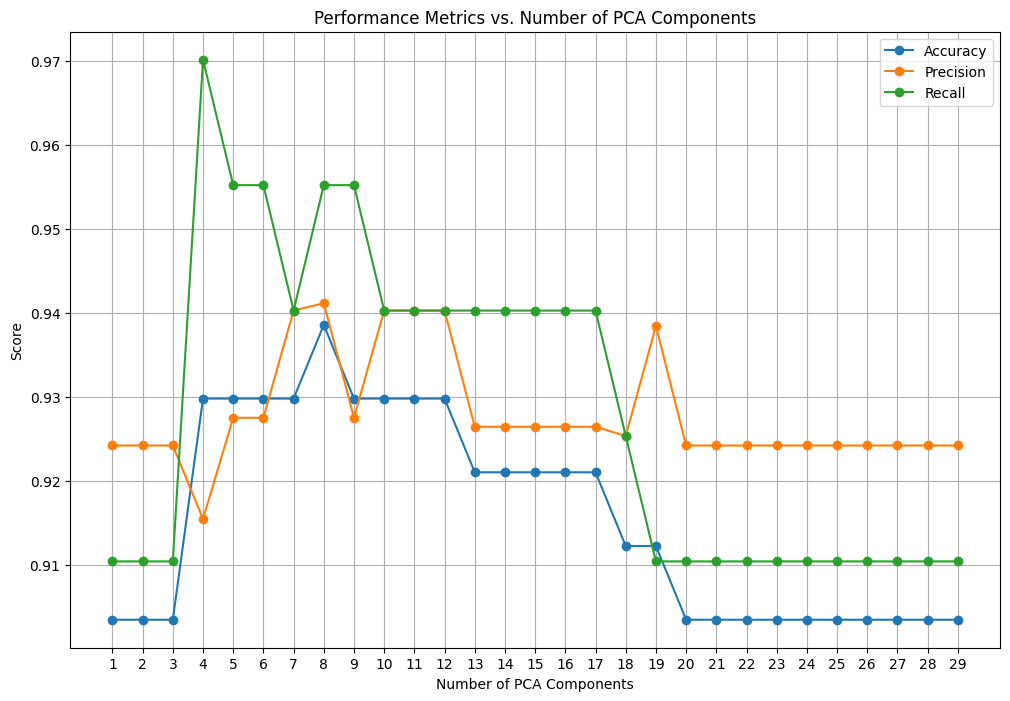

In [3]:
model = SVC(kernel='linear')
accuracy_array= []
precision_array= []
recall_array= []
for N in range(1,30):
  pca = PCA(n_components=N)  # Number of components to keep
  #build the reggresion
  X_test_pca = pca.fit_transform(X_test)
  X_train_pca = pca.fit_transform(X_train)
  model.fit(X_train_pca, Y_train) #logistic
  Y_pred = model.predict(X_test_pca)
  #record metrics
  accuracy_array.append(metrics.accuracy_score(Y_test, Y_pred))
  precision_array.append(metrics.precision_score(Y_test, Y_pred))
  recall_array.append(metrics.recall_score(Y_test, Y_pred))
#plot
plt.figure(figsize=(12, 8))
plt.plot(range(1, 30), accuracy_array, marker='o', label='Accuracy')
plt.plot(range(1, 30), precision_array, marker='o', label='Precision')
plt.plot(range(1, 30), recall_array, marker='o', label='Recall')
plt.title('Performance Metrics vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Score')
plt.xticks(range(1, 30))
plt.grid()
plt.legend()
plt.show()
# highest accuracy K value is 8

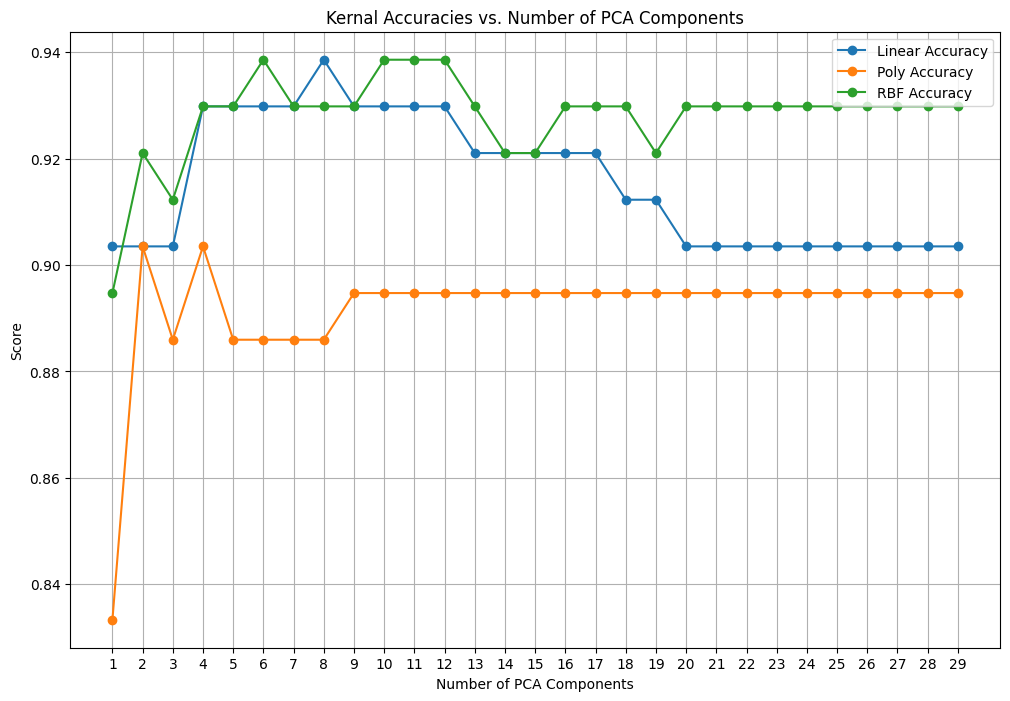

In [4]:
accuracy_array_poly= []
accuracy_array_rbf= []
for N in range(1,30):
  model = SVC(kernel='poly')
  pca = PCA(n_components=N)  # Number of components to keep
  #build the reggresion
  X_test_pca = pca.fit_transform(X_test)
  X_train_pca = pca.fit_transform(X_train)
  model.fit(X_train_pca, Y_train) #logistic
  Y_pred = model.predict(X_test_pca)
  accuracy_array_poly.append(metrics.accuracy_score(Y_test, Y_pred))
  model = SVC(kernel='rbf')
  pca = PCA(n_components=N)  # Number of components to keep
  #build the reggresion
  X_test_pca = pca.fit_transform(X_test)
  X_train_pca = pca.fit_transform(X_train)
  model.fit(X_train_pca, Y_train) #logistic
  Y_pred = model.predict(X_test_pca)
  accuracy_array_rbf.append(metrics.accuracy_score(Y_test, Y_pred))
plt.figure(figsize=(12, 8))
plt.plot(range(1, 30), accuracy_array, marker='o', label='Linear Accuracy')
plt.plot(range(1, 30), accuracy_array_poly, marker='o', label='Poly Accuracy')
plt.plot(range(1, 30), accuracy_array_rbf, marker='o', label='RBF Accuracy')
plt.title('Kernal Accuracies vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Score')
plt.xticks(range(1, 30))
plt.grid()
plt.legend()
plt.show()

Question 2


In [5]:
#set up
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/ECGR4105/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})
housing[varlist] = housing[varlist].apply(binary_map)
X1 = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]  # Replace with your actual feature columns
y = housing['price']
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_train_scaled, y_train).predict(X_test_scaled)
y_lin = svr_lin.fit(X_train_scaled, y_train).predict(X_test_scaled)
y_poly = svr_poly.fit(X_train_scaled, y_train).predict(X_test_scaled)

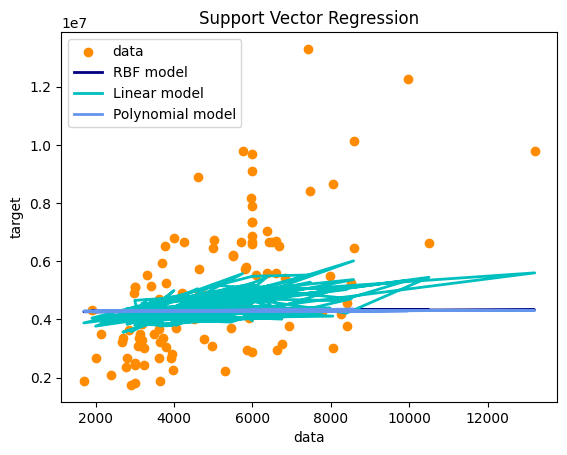

Mean Squared Error (MSE): 3629197132070.9478
Mean Absolute Error (MAE): 1398554.326474857


In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#graph the regressions
lw = 2
x= X_test['area']
#Print(len(x),' ',len(y_tr))
plt.scatter(x, y_test, color='darkorange', label='data')
plt.plot(x, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(x, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(x, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()
mse = mean_squared_error(y_test, y_lin)
mae = mean_absolute_error(y_test, y_lin)

# Print the loss metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


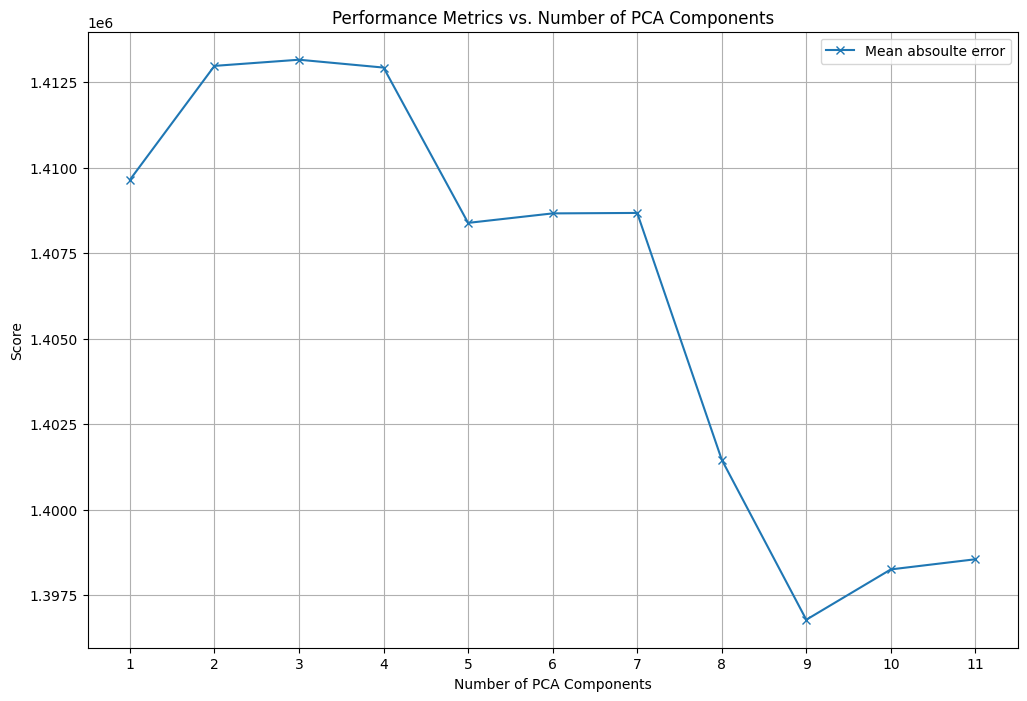

In [10]:
accuracy_array2=[]
for N in range(1, 12):
    pca = PCA(n_components=N)  # Number of components to keep
    # Fit PCA on the training data and transform both train and test data
    X_train_pca = pca.fit_transform(X_train_scaled)  # Fit and transform on training data
    X_test_pca = pca.transform(X_test_scaled)  # Only transform test data
    # Initialize and fit the SVR model
    model = SVR(kernel='linear', C=1e3)
    model.fit(X_train_pca, y_train)  # Fit on PCA-transformed training data
    # Make predictions
    Y_pred = model.predict(X_test_pca)  # Predict on PCA-transformed test data
    # Record metrics
    mae = mean_absolute_error(y_test, Y_pred)  # Calculate MAE
    accuracy_array2.append(mae)  # Store MAE in the list
plt.figure(figsize=(12, 8))
plt.plot(range(1, 12), accuracy_array2, marker='x', label='Mean absoulte error')
plt.title('Performance Metrics vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Score')
plt.xticks(range(1, 12))
plt.grid()
plt.legend()
plt.show()

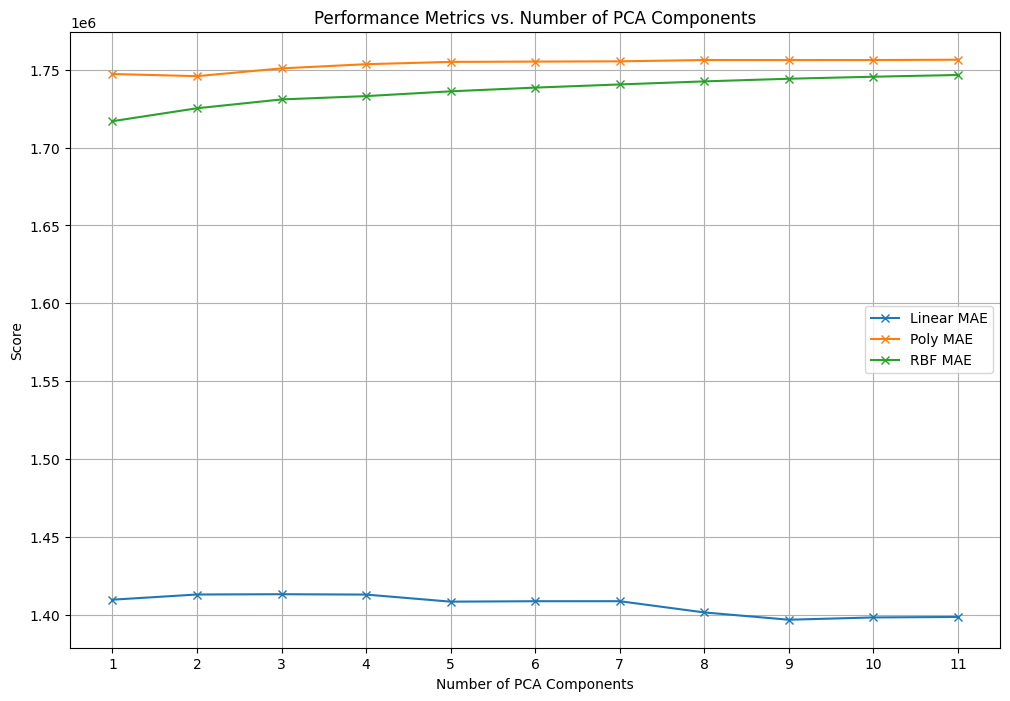

In [16]:
accuracy_array_poly2=[]
accuracy_array_rbf2=[]
for N in range(1, 12):
    pca = PCA(n_components=N)  # Number of components to keep
    # Fit PCA on the training data and transform both train and test data
    X_train_pca = pca.fit_transform(X_train_scaled)  # Fit and transform on training data
    X_test_pca = pca.transform(X_test_scaled)  # Only transform test data
    # Initialize and fit the SVR model
    model = SVR(kernel='poly', C=1e3, degree=2)
    model.fit(X_train_pca, y_train)  # Fit on PCA-transformed training data
    # Make predictions
    Y_pred = model.predict(X_test_pca)  # Predict on PCA-transformed test data
    # Record metrics
    mae = mean_absolute_error(y_test, Y_pred)  # Calculate MAE
    accuracy_array_poly2.append(mae)  # Store MAE in the list
    # Initialize and fit the SVR model
    model = SVR(kernel='rbf', C=1e3, gamma=0.1)
    model.fit(X_train_pca, y_train)  # Fit on PCA-transformed training data
    # Make predictions
    Y_pred = model.predict(X_test_pca)  # Predict on PCA-transformed test data
    # Record metrics
    mae = mean_absolute_error(y_test, Y_pred)  # Calculate MAE
    accuracy_array_rbf2.append(mae)  # Store MAE in the list
plt.figure(figsize=(12, 8))
plt.plot(range(1, 12), accuracy_array2, marker='x', label='Linear MAE')
plt.plot(range(1, 12), accuracy_array_poly2, marker='x', label='Poly MAE')
plt.plot(range(1, 12), accuracy_array_rbf2, marker='x', label='RBF MAE')
plt.title('Performance Metrics vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Score')
plt.xticks(range(1, 12))
plt.grid()
plt.legend()
plt.show()